# K-Means Clustering

**K-Means** is an unsupervised machine learning algorithm used for clustering similar data points into groups or "clusters".

---

## **Steps in K-Means Algorithm**

1. **Choose the number of clusters (K):**  
   Decide how many clusters (K) you want to divide your data into.

2. **Initialize centroids randomly:**  
   Select K random points as initial centroids.

3. **Assign data points to the nearest centroid:**  
   For each data point, calculate the **Euclidean distance** from all centroids and assign it to the closest one.

4. **Update the centroids:**  
   For each cluster, compute the **mean** of the points assigned to it. This mean becomes the new centroid.

5. **Repeat until convergence:**  
   Repeat Steps 3 and 4 until centroids do not change (or change very little). At this point, clustering is complete.

---

## **Understanding Centroid Update (2D Example)**

If your data has 2 features like **CGPA (X)** and **IQ (Y)**:

- **New Centroid X = Mean of all CGPA values in the cluster**
- **New Centroid Y = Mean of all IQ values in the cluster**

This becomes the new center for that cluster.

---

## **How to Choose Optimal Number of Clusters (K)?**

We use the **Elbow Method** by calculating **WCSS (Within-Cluster Sum of Squares)**.

### **WCSS:**
It is the sum of squared distances from each point in a cluster to the centroid of that cluster.


### WCSS Formula for One Cluster

For a single cluster, the Within-Cluster Sum of Squares (WCSS) is calculated as:

$$
\text{WCSS}_{\text{cluster}} = \sum_{i=1}^{n} \|x_i - \mu\|^2
$$

Where:  
- \( x_i \) = each data point in the cluster  
- \( \mu \) = centroid (mean) of the cluster  
- \( n \) = number of points in the cluster  
- \( \|x_i - \mu\|^2 \) = squared Euclidean distance from the centroid



## WCSS Formula (Within-Cluster Sum of Squares)

The WCSS measures the total squared distance between each point and the centroid of its assigned cluster.

$$
\text{WCSS} = \sum_{i=1}^{K} \sum_{x \in C_i} \|x - \mu_i\|^2
$$

Where:
- \( K \) = total number of clusters  
- \( C_i \) = set of points in cluster \( i \)  
- \( \mu_i \) = centroid of cluster \( i \)  
- \( \|x - \mu_i\|^2 \) = squared Euclidean distance between point \( x \) and centroid \( \mu_i \)




**Total WCSS = Sum of WCSS for all clusters**

---

## **Elbow Curve:**

- Plot a graph of **WCSS vs Number of Clusters (K)**
- The point where the curve forms an "elbow" (i.e., where WCSS decreases abruptly and then slows down) is the **optimal number of clusters**.

---

## **Summary:**

- **Unsupervised Algorithm**
- **Goal:** Group similar points
- **Distance Used:** Euclidean Distance
- **Technique to find optimal K:** Elbow Method using WCSS



## How to Choose Number of Clusters: Elbow Method

- **WCSS (Within-Cluster Sum of Squares)** measures the total squared distance between each point and its assigned centroid.
- Plot a graph of **WCSS vs Number of Clusters (K)**.
- The **Elbow Point** is where the WCSS starts to decrease slowly — this point indicates the optimal number of clusters.

> **Elbow Point = Point of steepest drop in the curve**  
> After this, adding more clusters doesn't significantly reduce WCSS.

---

## Assumptions of K-Means

1. **Spherical Clusters:**  
   Clusters are assumed to be spherical and evenly distributed in space.

2. **Equal Variance:**  
   Assumes all clusters have the same variance (homoscedasticity).

3. **Independent Features:**  
   Features are assumed to be independent of each other.

4. **Predefined K:**  
   The number of clusters must be defined before running the algorithm.

---

## Limitations of K-Means

1. **Sensitive to Initial Centroids:**  
   Final clusters can vary depending on how initial centroids are randomly initialized.

2. **Sensitive to Outliers:**  
   Outliers can skew the position of centroids drastically.

3. **Requires Predefined K:**  
   User must know the number of clusters beforehand, which is not always obvious.

4. **Assumes Convex Clusters:**  
   Cannot handle non-convex or irregularly shaped clusters.

5. **Feature Scaling Needed:**  
   Features need to be standardized or normalized to ensure correct distance calculations.

6. **Fails on Overlapping Clusters:**  
   Overlapping clusters confuse the model as it relies purely on distance.

7. **High Dimensionality Issues:**  
   In high-dimensional data, performance drops due to the **curse of dimensionality**.

---

## Advantages of K-Means

- **Simple and Easy to Implement**
- **Fast and Scalable** for large datasets
- **Unsupervised Learning:** No labeled data needed
- **Works with Various Data Types**
- **Easy to Interpret Results**

---

## Disadvantages of K-Means

- **Rigid Assignments:** Hard cluster boundaries (no soft assignment)
- **Poor at Handling Noise and Outliers**
- **Cluster Quality Depends on K**
- **Biased by Distance Metric**
- **Requires Preprocessing:** Scaling and normalization are essential



In [5]:
import warnings
warnings.filterwarnings('ignore')

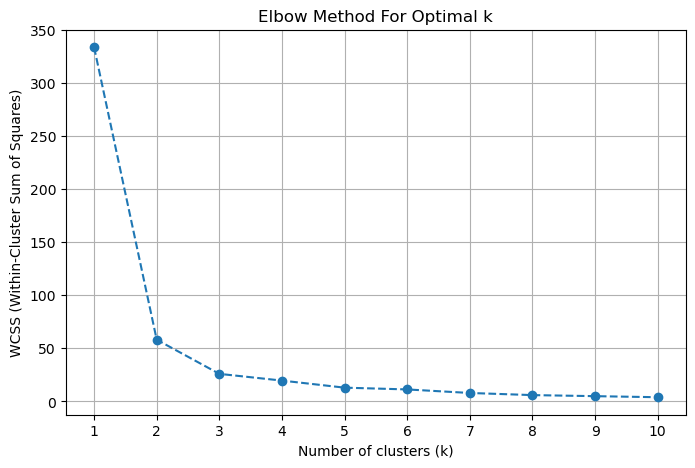

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Sample 2D data points
points = np.array([
    [1, 2],
    [2, 3],
    [3, 4],
    [8, 7],
    [7, 8],
    [9, 9],
    [10, 10],
    [10, 12],
    [11, 14],
    [3, 2],
    [4, 3],
    [5, 2]
])

# Step 1: Calculate WCSS for different values of k (1 to 10)
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(points)
    wcss.append(kmeans.inertia_)

# Step 2: Plot the Elbow curve
plt.figure(figsize=(8,5))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

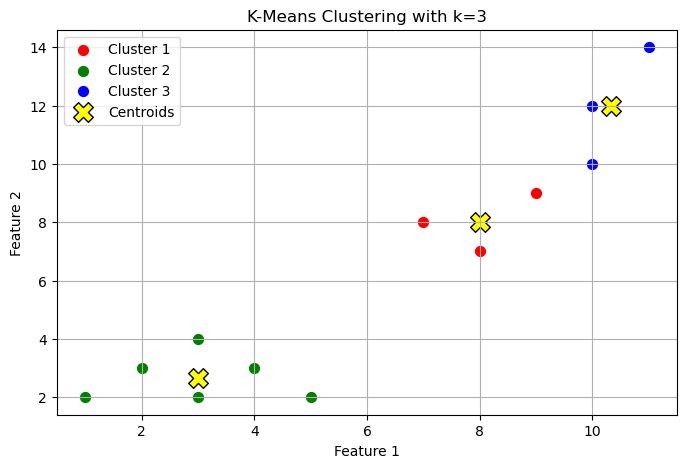

In [7]:
# Step 3: Choose optimal k (say k=3 from the elbow graph) and run KMeans
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(points)
centroids = kmeans.cluster_centers_

# Step 4: Visualize the clusters and centroids
plt.figure(figsize=(8,5))
colors = ['red', 'green', 'blue', 'purple', 'orange', 'cyan']
for i in range(optimal_k):
    plt.scatter(points[clusters == i, 0], points[clusters == i, 1], 
                s=50, c=colors[i], label=f'Cluster {i+1}')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], 
            s=200, c='yellow', marker='X', edgecolor='black', label='Centroids')

plt.title(f'K-Means Clustering with k={optimal_k}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# K-Means++ Clustering: Theory

## What is K-Means++?

*K-Means++* is an **improved initialization algorithm** for the K-Means clustering method. It enhances the placement of the initial centroids to improve clustering results and speed up convergence.

---

## Why K-Means++?

- The standard K-Means algorithm **initializes centroids randomly**, which can lead to:
  - Slow convergence.
  - Poor cluster quality.
  - Getting stuck in local optima.
  
- K-Means++ addresses this by **selecting initial centroids more carefully**, ensuring they are spread out in the data space.

---

## How does K-Means++ initialize centroids?

1. **Randomly select the first centroid** from the data points.
2. For each remaining data point \( x \), calculate the **distance \( D(x) \)** to the nearest already chosen centroid.
3. Select the next centroid from the remaining points **with probability proportional to \( D(x)^2 \)**. Points farther from existing centroids are more likely to be chosen.
4. Repeat steps 2 and 3 until **k centroids** are selected.

---

## Advantages of K-Means++

- **Faster convergence:** Usually requires fewer iterations than random initialization.
- **Improved cluster quality:** Initial centroids are well spread, reducing the chance of poor clustering.
- **Simple to implement:** Can be used as a drop-in replacement for standard centroid initialization.

---

## Summary

K-Means++ improves the robustness and accuracy of K-Means clustering by focusing on a smarter initialization process. It helps avoid poor cluster assignments that arise from unlucky random centroid initializations.


Initialized Centroids (K-Means++):
[[ 8  7]
 [ 1  2]
 [11 14]]


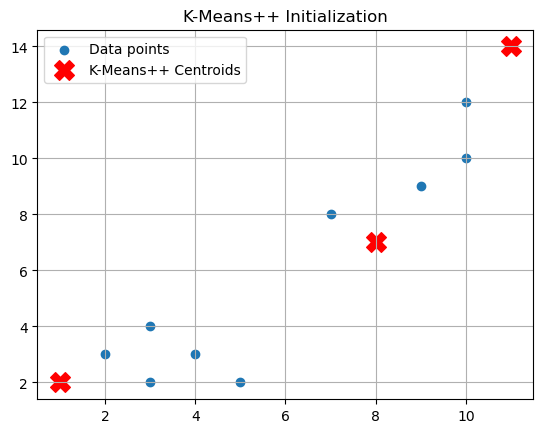

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

def kmeans_plus_plus_init(X, k):
    """
    Initialize centroids using K-Means++ algorithm.

    Parameters:
    X : ndarray of shape (n_samples, n_features) - dataset
    k : int - number of clusters

    Returns:
    centroids : ndarray of shape (k, n_features) - initialized centroids
    """
    n_samples, n_features = X.shape
    
    # Step 1: Randomly choose the first centroid
    centroids = []
    first_centroid_idx = np.random.randint(0, n_samples)
    centroids.append(X[first_centroid_idx])
    
    # Step 2: Choose remaining centroids
    for _ in range(1, k):
        distances = []
        for x in X:
            # Calculate distance to nearest centroid chosen so far
            dist_to_nearest = min(euclidean_distance(x, c) for c in centroids)
            distances.append(dist_to_nearest ** 2)  # Square the distance
        
        distances = np.array(distances)
        
        # Compute probabilities proportional to squared distances
        probabilities = distances / distances.sum()
        
        # Choose the next centroid index based on weighted probabilities
        next_centroid_idx = np.random.choice(n_samples, p=probabilities)
        centroids.append(X[next_centroid_idx])
    
    return np.array(centroids)


# Example Usage:

# Sample 2D data points
X = np.array([
    [1, 2], [2, 3], [3, 4], [8, 7], [7, 8], [9, 9],
    [10, 10], [10, 12], [11, 14], [3, 2], [4, 3], [5, 2]
])

k = 3

# Initialize centroids using K-Means++
init_centroids = kmeans_plus_plus_init(X, k)

print("Initialized Centroids (K-Means++):")
print(init_centroids)

# Visualize initial centroids and data points
plt.scatter(X[:, 0], X[:, 1], label='Data points')
plt.scatter(init_centroids[:, 0], init_centroids[:, 1], 
            s=200, c='red', marker='X', label='K-Means++ Centroids')
plt.title('K-Means++ Initialization')
plt.legend()
plt.grid(True)
plt.show()
